In [ ]:
# TFM - Grupo 2 - Entrega 18/05/2024

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
#import helper

pd.set_option('display.max_columns', None)

In [3]:
df_event = pd.read_csv("/content/drive/MyDrive/data/daily_calendar_with_events.csv")
df_prices = pd.read_csv("/content/drive/MyDrive/data/item_prices.csv")
df_sales = pd.read_csv("/content/drive/MyDrive/data/item_sales.csv")

In [ ]:
# Indicador serve para quando rodar novamente todo o fonte, nao gerar impressoes de dados que nao sao mais modificados, ganhando em tempo
IndicadorProcessarNovamente = True

# Tratamento DF Event

In [4]:
# daily_calendar_with_events.csv
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [5]:
df_event.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [6]:
colunas = df_event.columns

In [7]:
df_event.describe(datetime_is_numeric=True)

,weekday_int
count,1913.000000
mean,3.997386
std,2.001175
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,7.000000


In [8]:
df_event['date'] = pd.to_datetime(df_event.date)
#df_event.set_index('date', inplace=True)

In [9]:
df_event.dtypes

date           datetime64[ns]
weekday                object
weekday_int             int64
d                      object
event                  object
dtype: object

In [10]:
df_event["weekyear"] = df_event['date'].dt.isocalendar().week

df_event["year"] = df_event['date'].dt.year

In [11]:
def g(x):
    return  np.int16(str(x[0]) + str(x[1]))

df_event['yearweek'] = df_event[['year', 'weekyear']].apply(g, axis=1)

In [12]:
colunas = ['weekday_int', 'weekyear']
df_event[colunas].astype("int8")

colunas = ['year', 'yearweek']
df_event[colunas].astype("int16")

,year,yearweek
0,2011,20114
1,2011,20114
2,2011,20115
3,2011,20115
4,2011,20115
...,...,...
1908,2016,5008
1909,2016,5008
1910,2016,5008
1911,2016,5008


In [13]:
colunas = df_event.columns

In [14]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int64         
 3   d            1913 non-null   object        
 4   event        26 non-null     object        
 5   weekyear     1913 non-null   UInt32        
 6   year         1913 non-null   int64         
 7   yearweek     1913 non-null   int16         
dtypes: UInt32(1), datetime64[ns](1), int16(1), int64(2), object(3)
memory usage: 102.9+ KB


In [16]:
# Substituir linhas com valores NaN por 'Normalday'

df_event.fillna('Normalday', inplace=True)

In [18]:
df_event['event'].value_counts()

Normalday         1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: event, dtype: int64

# Tratamento DF Prices

In [19]:
# item_prices.csv
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [20]:
df_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [21]:
df_prices.describe(datetime_is_numeric=True)

,yearweek,sell_price
count,6.721786e+06,6.965706e+06
mean,2.013824e+05,5.518273e+00
std,1.450189e+02,4.387861e+00
min,2.011050e+05,1.200000e-02
25%,2.012480e+05,2.620100e+00
50%,2.014100e+05,4.200000e+00
75%,2.015150e+05,7.176000e+00
max,2.016170e+05,1.341500e+02


In [22]:
df_prices.query("yearweek.isnull()").head()

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454


In [23]:
colunas = df_prices.columns

In [24]:
# Adicionado zero para a semana do ano que esta null
df_prices["yearweek"].fillna(0, inplace=True)

In [25]:
colunas = ['yearweek']
df_prices[colunas].astype("int16")

,yearweek
0,4720
1,4721
2,4722
3,4723
4,4724
...,...
6965701,0
6965702,0
6965703,0
6965704,0


In [26]:
colunas = df_prices.columns
colunas

Index(['item', 'category', 'store_code', 'yearweek', 'sell_price'], dtype='object')

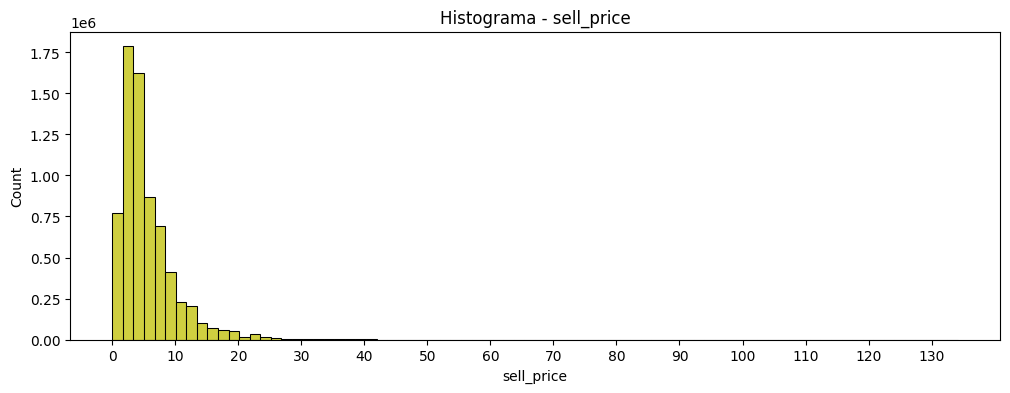

In [71]:
plt.figure(figsize=(12, 4), dpi=100)
sns.histplot(df_prices["sell_price"], bins = 80, color='y')

# Define os intervalos dos rótulos do eixo x
plt.xticks(range(0, int(df_prices["sell_price"].max()) + 1, 10))

plt.title("Histograma - sell_price")
plt.show()

KeyError: 'event'

# Tratamento DF Sales

In [27]:
#item_sales.csv

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [28]:
df_sales.head(100)

id              item    category    department  \
0   ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1   ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2   ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3   ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4   ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   
..                     ...               ...         ...           ...   
95  ACCESORIES_1_099_NYC_1  ACCESORIES_1_099  ACCESORIES  ACCESORIES_1   
96  ACCESORIES_1_100_NYC_1  ACCESORIES_1_100  ACCESORIES  ACCESORIES_1   
97  ACCESORIES_1_102_NYC_1  ACCESORIES_1_102  ACCESORIES  ACCESORIES_1   
98  ACCESORIES_1_103_NYC_1  ACCESORIES_1_103  ACCESORIES  ACCESORIES_1   
99  ACCESORIES_1_104_NYC_1  ACCESORIES_1_104  ACCESORIES  ACCESORIES_1   

                store store_code    region  d_1  d_2  d_3  d_4  d_5  d_6  d_7  \
0   Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
1   Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
2   Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
3   Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
4   Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
..                ...        ...       ...  ...  ...  ...  ...  ...  ...  ...   
95  Greenwich_Village      NYC_1  New York    2    1    1    1    3    1    3   
96  Greenwich_Village      NYC_1  New York    1    2    2    1    3    1    5   
97  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
98  Greenwich_Village      NYC_1  New York   25    8    5   22    7   16    0   
99  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   

    d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  \
0     0    0     0     0     0     0     0     0     0     0     0     0   
1     0    0     0     0     0     0     0     0     0     0     0     0   
2     0    0     0     0     0     0     0     0     0     0     0     0   
3     0    0     0     0     0     0     0     0     0     0     0     0   
4     0    0     0     0     0     0     0     0     0     0     0     0   
..  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
95    5    3     3     0     1     1     4     3     4     4     2     3   
96    4    1     2     2     1     1     1     3     3     4     1     3   
97    0    0     0     0     0     0     0     0     0     0     0     0   
98    5   16    30     2    25     5    24     0     0     0     0    19   
99    0    0     0     0     0     0     0     0     0     0     0     0   

    d_20  d_21  d_22  d_23  d_24  d_25  d_26  d_27  d_28  d_29  d_30  d_31  \
0      0     0     0     0     0     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     0     0     0     0     0     0     0     0     0     0     0   
3      0     0     0     0     0     0     0     0     0     0     0     0   
4      0     0     0     0     0     0     0     0     0     0     0     0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
95     2     3     0     2     3     3     3     0     5     4     3     1   
96     0     1     1     0     3     3     0     3     1     1     2     2   
97     0     0     0     0     0     0     0     0     0     0     0     0   
98     9    14    43     4    21    13     0    26     1    16     0     4   
99     0     0     0     0     0     0     0     0     0     0     0     0   

    d_32  d_33  d_34  d_35  d_36  d_37  d_38  d_39  d_40  d_41  d_42  d_43  \
0      0     0     0     0     0     0     0     0     0     0     0     0   
1      0     0     0     0     0     0     0     0     0     0     0     0   
2      0     0     0     0     0     0     0     0     0     0     0     0   


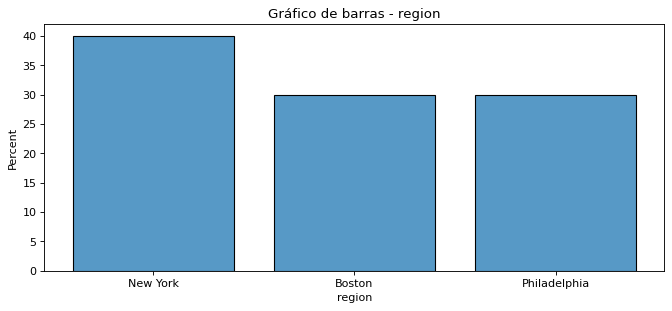

In [72]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(data=df_sales, x="region", shrink=.8, stat='percent')
plt.title("Gráfico de barras - region")
plt.show()

In [77]:
df_sales['region'].value_counts(normalize=True)

New York        0.4
Boston          0.3
Philadelphia    0.3
Name: region, dtype: float64

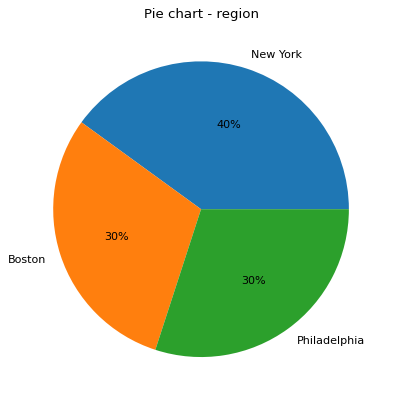

In [78]:
plt.figure(figsize=(6, 6), dpi=80, facecolor='white')
plt.pie(df_sales['region'].value_counts(normalize=True)*100, labels = df_sales['region'].value_counts(normalize=True).index, autopct='%.0f%%')
plt.title("Pie chart - region")
plt.show()

In [29]:
df_sales.describe()

d_1           d_2           d_3           d_4           d_5  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       1.070220      1.041292      0.780026      0.833454      0.627944   
std        5.126689      5.365468      3.667454      4.415141      3.379344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      360.000000    436.000000    207.000000    323.000000    296.000000   

                d_6           d_7           d_8           d_9          d_10  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.958052      0.918662      1.244080      1.073663      0.838701   
std        4.785947      5.059495      6.617729      5.917204      4.206199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      314.000000    316.000000    370.000000    385.000000    353.000000   

               d_11          d_12          d_13          d_14          d_15  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.756674      0.775927      0.779141      0.867334      1.142440   
std        3.665969      3.697822      3.486595      3.484608      4.636395   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      279.000000    258.000000    163.000000    107.000000    133.000000   

               d_16          d_17          d_18          d_19          d_20  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       1.193178      0.715120      0.789439      0.703280      0.666382   
std        4.662770      2.993414      3.296922      2.811648      2.611911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      149.000000    122.000000    111.000000     83.000000     95.000000   

               d_21          d_22          d_23          d_24          d_25  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.777993      1.039324      0.960413      0.786028      0.672384   
std        2.985123      3.923110      3.597620      3.084773      2.874189   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      100.000000    132.000000    120.000000    113.000000    158.000000   

               d_26          d_27          d_28          d_29          d_30  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.680781      0.665038      0.738898      0.980912      0.941522   
std        2.727852      2.637849      2.842334      3.714944      3.688771   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000

In [30]:
colunas = df_sales.columns

In [31]:
# list_columns = ""
lista_valores = []

for i in range(1, 1914):
    # Adiciona o valor "d_" seguido do número à lista
    lista_valores.append("d_" + str(i))

df_sales[lista_valores].astype("int16")

d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  d_13  \
0        0    0    0    0    0    0    0    0    0     0     0     0     0   
1        0    0    0    0    0    0    0    0    0     0     0     0     0   
2        0    0    0    0    0    0    0    0    0     0     0     0     0   
3        0    0    0    0    0    0    0    0    0     0     0     0     0   
4        0    0    0    0    0    0    0    0    0     0     0     0     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
30485    0    0    2    2    0    3    1    4    1     0     0     3     4   
30486    0    0    0    0    0    5    0    1    1     3     1     1     0   
30487    0    6    0    2    2    4    1    8    5     2     7     5     3   
30488    0    0    0    0    0    0    0    0    0     0     0     0     0   
30489    0    0    0    0    0    0    0    0    0     0     0     0     0   

       d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  d_25  \
0         0     0     0     0     0     0     0     0     0     0     0     0   
1         0     0     0     0     0     0     0     0     0     0     0     0   
2         0     0     0     0     0     0     0     0     0     0     0     0   
3         0     0     0     0     0     0     0     0     0     0     0     0   
4         0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485     4     0     0     1     0     1     1     7     7     3     6     3   
30486     4     2     0     1     2     1     1     0     0     0     0     3   
30487     5    20     8    10     3     3     4     7     2     3     5     6   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  d_37  \
0         0     0     0     0     0     0     0     0     0     0     0     0   
1         0     0     0     0     0     0     0     0     0     0     0     0   
2         0     0     0     0     0     0     0     0     0     0     0     0   
3         0     0     0     0     0     0     0     0     0     0     0     2   
4         0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485     3     7    12     4     2     7     5    12     5     3     3     7   
30486     1     1     1     2     0     1     0     1     1     1     3     3   
30487     3     4     1     2     5     1     2     2     2     1     9     8   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  d_49  \
0         0     0     0     0     0     0     0     0     0     0     0     0   
1         0     0     0     0     0     0     0     0     0     0     0     0   
2         0     0     0     0     0     0     0     0     0     0     0     0   
3         0     0     0     2     0     1     0     0     0     0     0     0   
4         0     0     0     0     0     0     0     0     0     0     0     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
30485     6     4     6     3     6     2     3     4     1     1     3     2   
30486     4     4     3     6     1     0     1     2     3     0     1     1   
30487     1     6     3     3     4    10     4     6     3     2     1     1   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  d_61  \
0         0     0     0     0     0     0     0     0     0     0     

In [32]:
colunas = df_sales.columns

# Merge Entre DF Sales e DF Event

In [33]:
sales_melted = df_sales.melt(id_vars=['id', 'item'], var_name='d', value_name='value_sales')

# Juntar os datasets com base na coluna 'd'
merged_df = pd.merge(sales_melted, df_event[['d', 'date', 'yearweek', 'year']], on='d')

merged_df.head()

,id,item,d,value_sales,date,yearweek,year
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,0,2011-01-29,20114,2011
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,d_1,0,2011-01-29,20114,2011
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,d_1,0,2011-01-29,20114,2011
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,d_1,0,2011-01-29,20114,2011
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,d_1,0,2011-01-29,20114,2011


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item         object        
 2   d            object        
 3   value_sales  object        
 4   date         datetime64[ns]
 5   yearweek     int16         
 6   year         int64         
dtypes: datetime64[ns](1), int16(1), int64(1), object(4)
memory usage: 3.2+ GB


In [35]:
colunas = merged_df.columns

In [36]:
# Agrupar os valores por região e data, fazendo a soma da coluna 'value' e mostrando todas as colunas
sales_agg = merged_df.groupby(['id', 'item']).agg({
    'value_sales': 'sum',
    #'item':'first',
    #'category':'first',
    #'department':'first',
    #'store':'first',
    #'store_code':'first',
    #'region':'first',
    'd':'first',
    'yearweek':'first',
    'year':'first'
}).reset_index()  # Resetando o índice para criar um novo DataFrame

sales_agg.head()

,id,item,value_sales,d,yearweek,year
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,260,d_1,20114,2011
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,402,d_1,20114,2011
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,385,d_1,20114,2011
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,600,d_1,20114,2011
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,542,d_1,20114,2011


In [37]:
colunas = sales_agg.columns

In [38]:
# Cria um novo dataframe com os dados agrupados e valore somados
colunas = list(sales_agg.drop('value_sales', axis=1).columns)
sales_goup = sales_agg.groupby(colunas)['value_sales'].sum().reset_index()

In [39]:
sales_goup.head()

,id,item,d,yearweek,year,value_sales
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114,2011,260
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114,2011,402
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114,2011,385
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114,2011,600
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114,2011,542


# Merge entre DF Agrupado e DF Prices

In [40]:
# concatena o novo dataframe agrupado com o dataframe prices para ter o valor da semana
merged_sales_group_prices = pd.merge(sales_goup, df_prices, on=['item', 'yearweek'], how='outer')

In [42]:
merged_sales_group_prices.head()

,id,item,d,yearweek,year,value_sales,category,store_code,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114.0,2011.0,260,NaN,NaN,NaN
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114.0,2011.0,402,NaN,NaN,NaN
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114.0,2011.0,385,NaN,NaN,NaN
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114.0,2011.0,600,NaN,NaN,NaN
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114.0,2011.0,542,NaN,NaN,NaN


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

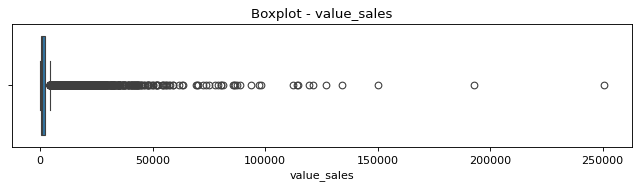

In [46]:
plt.figure(figsize=(10, 2), dpi=80)
sns.boxplot(x=sales_agg["value_sales"])
plt.title("Boxplot - value_sales")
plt.show()

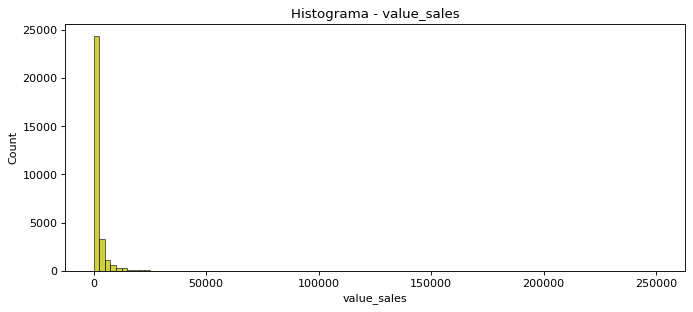

In [50]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(sales_agg ["value_sales"], bins = 100, color='y')
plt.title("Histograma - value_sales")
plt.show()

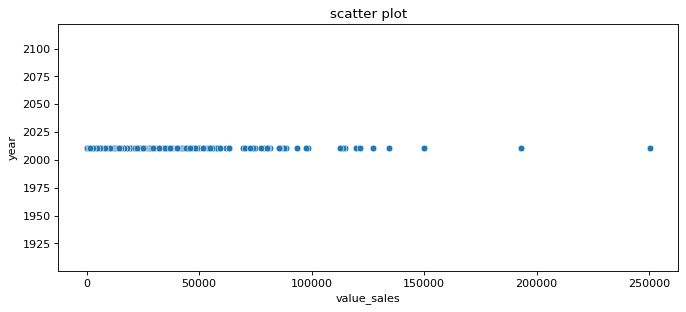

In [80]:
plt.figure(figsize=(10, 4), dpi=80)
sns.scatterplot(data=sales_agg, x="value_sales", y="year")
plt.title("scatter plot")
plt.show()